<a href="https://colab.research.google.com/github/schedldave/cv2022/blob/main/HW02_Circles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision Homework 02 - Circles

Contact: David C. Schedl (david.schedl@fh-hagenberg.at)

Note: this is the starter pack for the **Computer Vision** homework. You do not need to use this template!

## Task:
Implement a circular object detection/comparison algorithm. 

Your algorithm should:
 
* first identify and locate round objects (e.g., car wheels, balls, coins, clocks, road signs, ...) in one or more reference images (e.g., Hough Transform), 
* then describe the objects with feature vectors such that they can be found again in new images (e.g., SIFT). 

Pick the type of objects that you want to detect and describe. It should be something round where you have multiple different instances. Start simple (e.g., a small dataset with a few different objects) and see how far you can get. 

For describing one categorie/type of the round object use one or multiple descriptors. We used SIFT in the tutorial, but any other descripter can be used too (e.g., [SURF, BRISK, ORB ...](https://docs.opencv.org/4.5.5/d0/d13/classcv_1_1Feature2D.html)). Matching can be done with the nearest neighbour distance or any other strategy. 
Evaluate your detection and matching algorithm on a number of images. Discuss how well it works, when it works, when it does not and why. 


**Further comments/hints:**

*   The matching algorithm will not be perfect, and there will be wrong matches. Don't worry too much about that! 
*   Start with a small dataset and see how far you can get.
*   Think about the problem 🤔, solve it, and critically evaluate your solution.
*   Summarize your ideas and findings in the report. 



**Have fun!** 😸


In [1]:
# SETUP
if 'google.colab' in str(get_ipython()):
  # install a newer opencv version on Colab. The default does not support SIFT!
  !pip install opencv-contrib-python==4.5.*

# import the libraries we use
import os
import cv2 # openCV
import numpy as np
import matplotlib.pyplot as plt



 
# loading images
!curl -o "coins.jpg" "https://upload.wikimedia.org/wikipedia/commons/e/ee/Kiloware.JPG"

# utility function(s)
def imshow(image, *args, **kwargs):
    """A replacement for cv2.imshow() for use in Jupyter notebooks using matplotlib.

        Args:
          image : np.ndarray. shape (N, M) or (N, M, 1) is an NxM grayscale image. shape
            (N, M, 3) is an NxM BGR color image. 
    """
    if len(image.shape) == 3:
      # Height, width, channels
      # Assume BGR, do a conversion  
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Draw the image
    plt.imshow(image, *args, **kwargs)
    # We'll also disable drawing the axes and tick marks in the plot, since it's actually an image
    plt.axis('off')
    # Make sure it outputs
    # plt.show()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1466k  100 1466k    0     0  6918k      0 --:--:-- --:--:-- --:--:-- 6918k


### Example Datasets

I would recommend to create your own dataset. However, below you find a list of some datasets (I found) which can be used too.

#### Coins 💰
There are a variety of datasets available online that provide images with circular objects. One of the most obvious circular shaped objects are coins 💰! 

* [A dataset of Roman Republican coins, provided by the Museum of Fine Arts in Vienna](https://zenodo.org/record/4454549#.YkrFsuhByF4): old coins might be very hard to identify (not perfectly round, used and very, very old).

* [Images of brazilian coins hosted at Kaggle](https://www.kaggle.com/datasets/lgmoneda/br-coins): use the images where multiple coins are visible.


#### Road Signs 🛑
Road signs, in particular speed limits, are typically round.  

* [A small dataset with road signs and annotations on Kaggle](https://www.kaggle.com/datasets/andrewmvd/road-sign-detection): only use the round or nearly round signs. 


**Note: you do not need to use any of these datasets. Any dataset is fine!** 

### Hough Transformation for Circles

Below you find an example of how to use the circular Hough transformation.

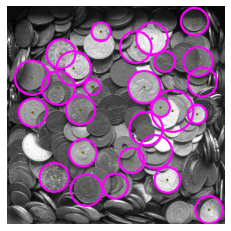

In [2]:
img = cv2.imread('coins.jpg')
img = cv2.resize(img,(512,512))
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(gray,cv2.COLOR_GRAY2BGR)

rows = gray.shape[0]
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 20,
                            param1=200, param2=40, # tune these parameters for your images!
                            minRadius=10, maxRadius=50)

detected_circles = []
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(img, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(img, center, radius, (255, 0, 255), 3)

        # a circle has the following parameters
        detected_circles.append ({ 'x': center[0], 'y': center[1], 'radius': i[2] })



imshow(img)

### Features

OpenCV's feature detector can be tuned to only detect features in a masked area. This is shown in the example below. 

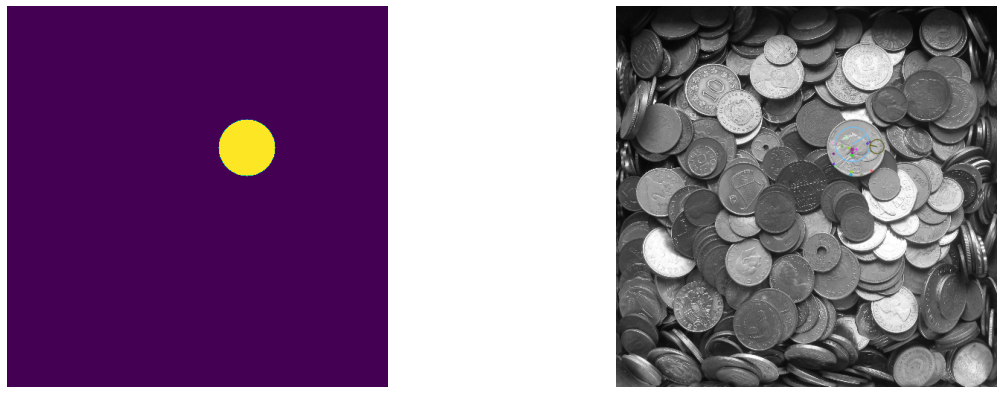

In [3]:
img = cv2.imread('coins.jpg')
img = cv2.resize(img,(512,512))
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# initialize the SIFT keypoint detector
sift = cv2.SIFT_create() # switch to BRISK, SURF or any other descriptor here!

pt = detected_circles[0]

# create a mask at the first detected circle
mask = np.zeros_like(gray, dtype=np.uint8)
cv2.circle(mask,(pt['x'], pt['y']), pt['radius'], color=255, thickness=-1)

# only detect features in the masked region
kp, desc = sift.detectAndCompute(gray,mask)

# display
img=cv2.drawKeypoints(gray,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(20,7))
plt.subplot(121)
imshow(mask)
plt.subplot(122)
imshow(img)